# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
import pandas as pd
import sklearn
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [2]:
price=pd.read_csv('Real estate.csv')
price.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [3]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [4]:
price.shape

(414, 8)

### What are the features available in the dataset?

In [5]:
price.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [6]:
price.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [7]:
price_feature=price.drop(columns='Y house price of unit area')
price_feature

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [8]:
price_target=price['Y house price of unit area']
price_target

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [9]:
X=price_feature
y=price_target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Choose the model (Linear Regression)

In [11]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [13]:
lr=LinearRegression(fit_intercept=True)

### Train the model

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

### Apply the model

In [15]:
y_pred=lr.predict(X_test)            
y_pred

array([46.63500169, 40.24113343, 43.27451225, 39.42392538, 26.41737818,
       46.7590668 , 44.373057  , 47.01617107, 24.73302641, 55.20723326,
       35.24453596, 36.78602271, 36.4558036 , 24.60160749, 36.61256768,
       33.53862681, 45.03590136, 44.58139926, 28.94545078, 44.76056711,
        0.46682603, 36.54865933, 47.03676744, 46.0376176 ,  9.80819889,
       38.86395109, 11.68678066, 43.58101045, 36.53440728, 38.39504924,
       14.01814402, 40.52535499, 36.19016624, 27.92929379, 47.6811978 ,
       31.72262215, 50.12022329, 11.90992025, 49.7289872 , 39.96859915,
       40.30835716, 40.32736106, 48.95145733, 37.02885946, 39.3123335 ,
       47.1579367 , 43.1837143 , 19.4356479 , 46.5513857 , 45.01065879,
       47.95387969, 47.84393899, 42.13580911, 42.63926258, 36.87174334,
       14.96775073, 38.47796057, 34.52383209, 29.14602677, 47.16202053,
       31.67605557, 34.02453236, 14.45447017,  8.47825601,  8.65310317,
       33.98533086, 28.95263146, 47.78257453, 34.71098129, 31.22

### Display the coefficients

In [16]:
lr.coef_

array([-6.25951905e-03,  5.85978276e+00, -2.39516367e-01, -5.22951335e-03,
        1.06493330e+00,  2.36128176e+02, -5.44687080e+01])

### Find how well the trained model did with testing data

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_test,y_pred)

0.5532450005316446

### Plot House Age Vs Price
#### Hint: Use regplot in sns

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

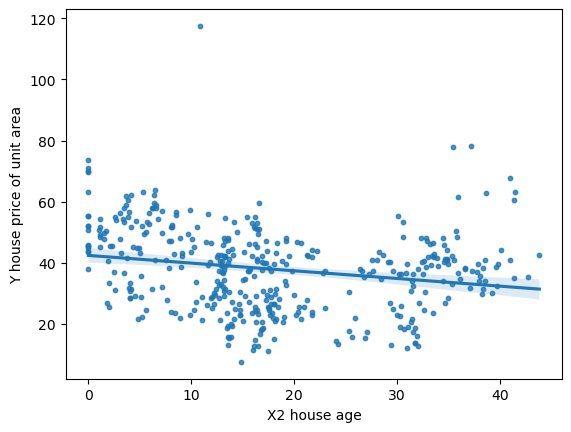

In [19]:
import matplotlib.pyplot as plt

sns.regplot(x='X2 house age',y='Y house price of unit area',data=price,scatter_kws={'s':10})  

### Plot Distance to MRT station Vs Price

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

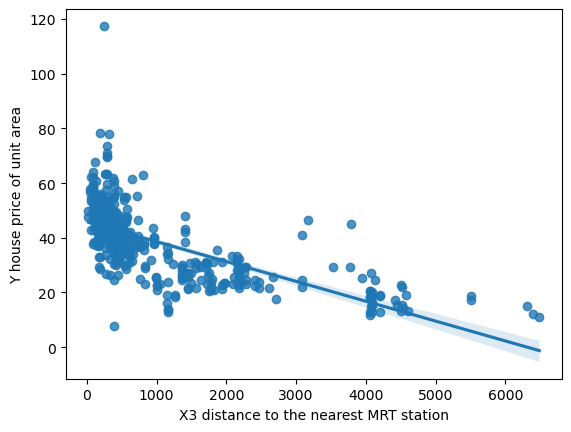

In [20]:
sns.regplot(y='Y house price of unit area',x='X3 distance to the nearest MRT station',data=price)

### Plot Number of Convienience Stores Vs Price

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

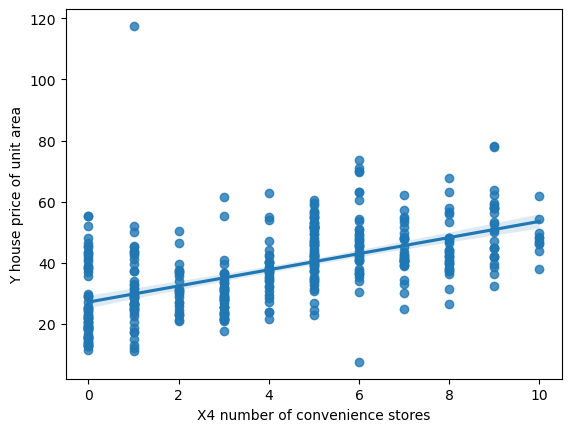

In [21]:
sns.regplot(x='X4 number of convenience stores',y='Y house price of unit area',data=price)